In [1]:
import csv
import sys
sys.path.insert(0,"../python/")
from MC_Plots import style
from Sigma_study import energy

import numpy as np



import collections
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as pp
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
import os
import re
import fnmatch
import pandas as pd
import matplotlib.font_manager

plt.rc('text', usetex=True)
import lmfit

from lmfit import Model

In [2]:
ps = style(figure_width = 9,
                 spine_color= 'Black')

In [3]:
#make classes of all the energies 
en500= energy(energy=500,edep_max=250)
en750= energy(energy=750,edep_max=250)
en1000= energy(energy=1000,edep_max=250)
en1250= energy(energy=1250,edep_max=250)
en1500= energy(energy=1500,edep_max=250)
en2000= energy(energy=2000,edep_max=250)
en2500= energy(energy=2500,edep_max=250)

#and a list to loop over
classlist=[en500,en750,en1000,en1250,en1500,en2000,en2500]

In [4]:
#calculate all sigmas needed the first time 
for i in classlist[1:]:
    sigmas = i.get_sigmas()
    np.save('sigmas%i'%i.energy,sigmas)


10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100


../python/Sigma_study.py:118: RuntimeWarning: invalid value encountered in double_scalars
  s_nonvrt = np.sqrt(np.var(tw_nonvrt[0])) / np.mean(tw_nonvrt[0])


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
100000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10000000
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9

In [15]:
#calculate acceleration factor
acc_factors=[]
energies = []
for i in classlist:
    sigmas_arr=np.load('sigmas%i.npy'%i.energy)#load sigmas
    sigmas=sigmas_arr.tolist()
    acc_factors.append(i.acc_fac(sigmas=sigmas))
    energies.append(i.energy)

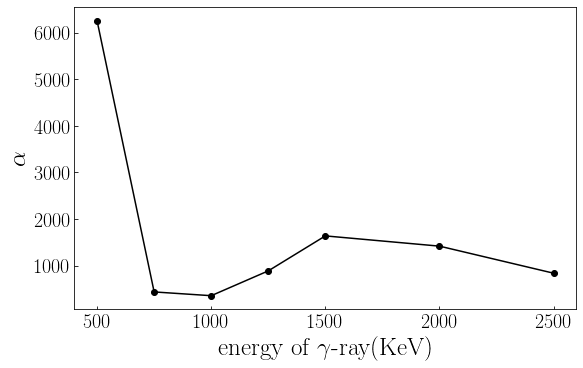

In [16]:
ps.latexify()
fig , ax=plt.subplots(1,1)
#plot fit-lines
ax.plot(energies,acc_factors,'-o' , color="Black")
# ax.plot(energies,df['acc'], color="Black")

ax.set_ylabel(r'$\alpha$')
ax.set_xlabel('energy of $\gamma$-ray(KeV)')

ps.format_axes(ax)

plt.savefig('energyVSAF.pdf')

plt.show()